<h1><center>
California Housing problem</center></h1>
<h4><center>Ali Ehab Mohamed (320210045)</center></h4>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, zscore, f_oneway

# Problem Introduction 

The California housing prices dataset provides a rich collection of features related to housing districts in California, including median housing prices. This dataset is widely used in machine learning to explore the relationships between various factors and predict the median housing price for different districts. The goal of this problem is to develop a predictive model that can accurately estimate the median housing price based on the given features.

Understanding the dynamics that influence housing prices is crucial for various stakeholders, including real estate investors, policymakers, and homebuyers. A reliable predictive model can assist in making informed decisions about property investments, assessing the impact of socio-economic factors on housing prices, and supporting individuals in their search for affordable housing.

In this context, the task is to analyze the California housing prices dataset, preprocess the data, and build a machine learning model capable of predicting the median housing price for a given district. By developing an accurate predictive model, it is possible to contribute to the broader understanding of housing market trends and provide valuable insights for those interested in the California real estate landscape.

# Dataset Description

A link to the dataset used can be found [here](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data).

1. **longitude**: A measure of how far west a house is; a higher value is farther west
2. **latitude**: A measure of how far north a house is; a higher value is farther north
3. **housingMedianAge**: Median age of a house within a block; a lower number is a newer building
4. **totalRooms**: Total number of rooms within a block
5. **totalBedrooms**: Total number of bedrooms within a block
6. **population**: Total number of people residing within a block
7. **households**: Total number of households, a group of people residing within a home unit, for a block
8. **medianIncome**: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. **medianHouseValue**: Median house value for households within a block (measured in US Dollars)
10. **oceanProximity**: Location of the house w.r.t ocean/sea

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Handling of missing or invalid data

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df = df.drop_duplicates()

In [11]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.00000

In [172]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [173]:
encoded_df = pd.get_dummies(df, columns = ['ocean_proximity']) 
encoded_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


# Data Visualization

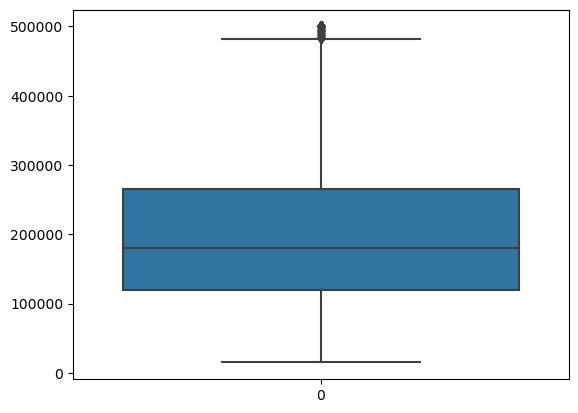

In [174]:
sns.boxplot(encoded_df['median_house_value'])
plt.show()

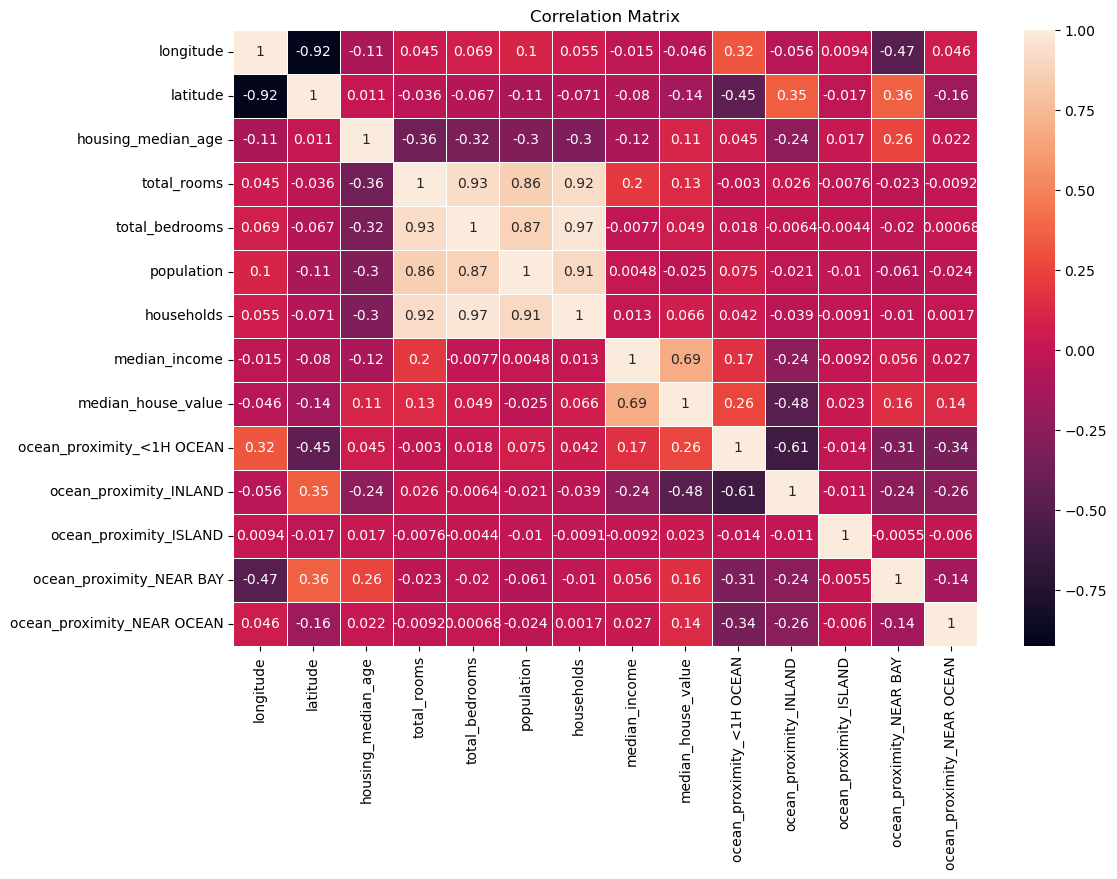

In [175]:
cov = encoded_df.cov()
cor = encoded_df.corr()


plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, linewidths = .5)
plt.title("Correlation Matrix")
plt.show()

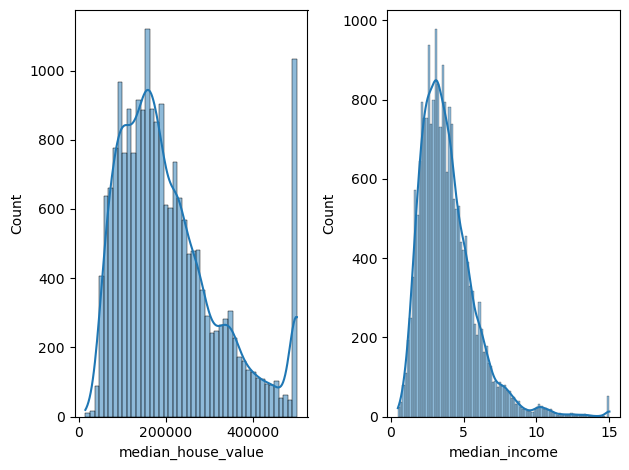

In [176]:
plt.subplot(1,2,1)
sns.histplot(df['median_house_value'], kde=True)

plt.subplot(1,2,2)
sns.histplot(df['median_income'], kde=True)

plt.tight_layout()

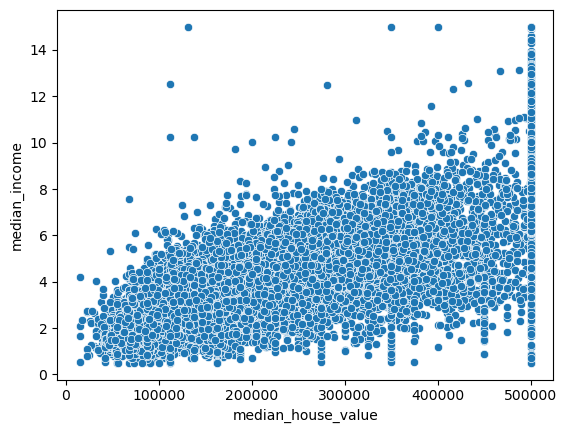

In [177]:
sns.scatterplot(data=encoded_df, x='median_house_value', y='median_income')
plt.show()

# Data Analysis

In [178]:
encoded_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,537.870553,419.266592,1.0000,297.0000,438.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [179]:
variance = np.var(encoded_df)
skewness = encoded_df.skew()
kurtosis = encoded_df.kurt()
print("Variance: \n{}".format(variance))
print("\nSkewness: \n{}".format(skewness))
print("\nKurtosis: \n{}".format(kurtosis))

Variance: 
longitude                     4.013945e+00
latitude                      4.562072e+00
housing_median_age            1.583886e+02
total_rooms                   4.759215e+06
total_bedrooms                1.757760e+05
population                    1.282408e+06
households                    1.461690e+05
median_income                 3.609148e+00
median_house_value            1.331550e+10
ocean_proximity_<1H OCEAN     2.467093e-01
ocean_proximity_INLAND        2.166548e-01
ocean_proximity_ISLAND        2.421894e-04
ocean_proximity_NEAR BAY      9.863980e-02
ocean_proximity_NEAR OCEAN    1.121950e-01
dtype: float64

Skewness: 
longitude                     -0.297801
latitude                       0.465953
housing_median_age             0.060331
total_rooms                    4.147343
total_bedrooms                 3.477023
population                     4.935858
households                     3.410438
median_income                  1.646657
median_house_value             0.977763


In [180]:
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 999999]
labels = ['0-50000', '50000-100000', '100000-150000', '150000-200000', '200000-250000', '250000-300000', '300000-350000',
         '350000-400000', '400000-450000', '450000-500000', '500000+']
new_df = encoded_df
new_df['price_range']= pd.cut(encoded_df['median_house_value'], bins=bins, labels=labels, right=False)


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(new_df['price_range'])
LabelEncoder()
labeled = le.transform(encoded_df['price_range'])

In [181]:
import scipy.stats as stats


med_values = encoded_df['median_house_value']

# Sample data for three groups
group1 = med_values.iloc[0:100]
group2 = med_values.iloc[800:900]
group3 = med_values.iloc[1200:1300]

### ANOVA

In [182]:
# Performing one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

# Displaying results
print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

F Statistic: 66.51311126324842
P-value: 1.3500015100826037e-24
Reject the null hypothesis. There is a significant difference between the means.


### Z-Test

In [183]:
alpha = 0.05

sample_mean = group1.mean()
population_mean = med_values.mean()
population_std = med_values.std()
sample_size = group1.count()

z_score = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
print('Z-Score :',z_score)

# Approach 1: Using Critical Z-Score

# Critical Z-Score
z_critical = stats.norm.ppf(1-alpha)
print('Critical Z-Score :',z_critical)

# Hypothesis
if z_score > z_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")
    
p_value = 1-stats.norm.cdf(z_score)

print('\np-value :',p_value)

# Hypothesis
if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Z-Score : -4.7752080086721005
Critical Z-Score : 1.6448536269514722
Fail to Reject Null Hypothesis

p-value : 0.9999991023920172
Fail to Reject Null Hypothesis


### Chi-Square Test

In [184]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(encoded_df['median_house_value'], df['median_income'])
res = chi2_contingency(contingency_table)
print("Between Price Range and median Income\nStatistic: {}\nP-Val: {}".format(res.statistic, res.pvalue))

Between Price Range and median Income
Statistic: 53276770.92236957
P-Val: 0.0


## Feature Reduction

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict

In [186]:
X = np.array(encoded_df.drop(['median_house_value', 'price_range'],axis=1), dtype='float64')
y = labeled

In [187]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Standardize the features (important for PCA and LDA)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [189]:
# Function for training and evaluating a classifier
def train_and_evaluate(classifier, X_train, X_test, y_train, y_test):
    """
    Train a classifier, make predictions on the test set, and calculate accuracy.
    
    Parameters:
    - classifier: The classifier model to be trained and evaluated.
    - X_train: The training data features.
    - X_test: The testing data features.
    - y_train: The training data labels.
    - y_test: The testing data labels.
    
    Returns:
    - accuracy: The accuracy of the classifier on the test set.
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

### Linear Discriminant Analysis, as a Feature Reduction

In [190]:
# Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

In [191]:
# Classification using k-Nearest Neighbors (k-NN) with LDA features
knn_lda = KNeighborsClassifier(n_neighbors=3)

In [192]:
# K-fold cross-validation for LDA
cv_lda = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_lda = cross_val_predict(knn_lda, X_train_lda, y_train, cv=cv_lda)
fpr_lda, tpr_lda, _ = roc_curve(y_train, y_pred_lda, pos_label=1)
roc_auc_lda = auc(fpr_lda, tpr_lda)

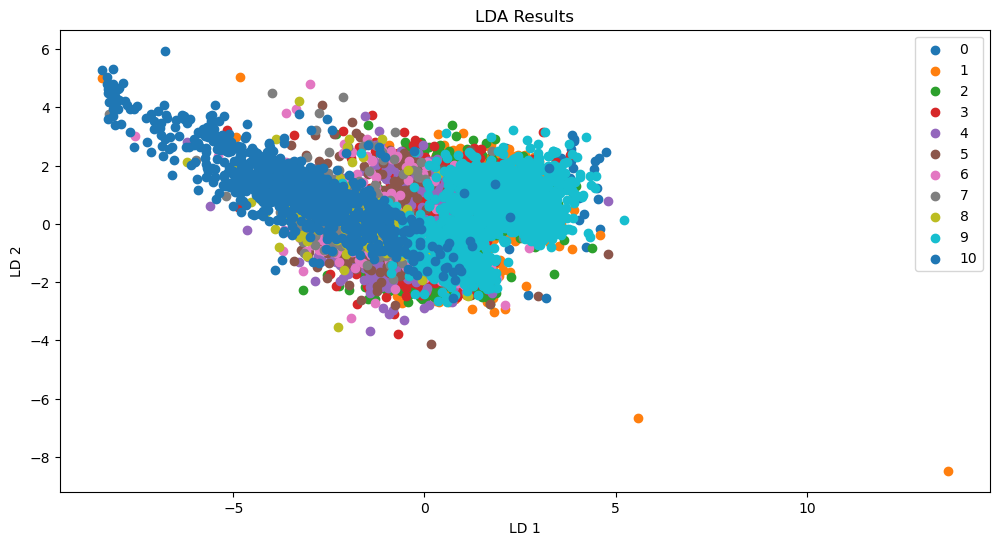

In [193]:
# Visualize the data after LDA
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_lda[y_train == label, 0], X_train_lda[y_train == label, 1], label=label)
plt.title('LDA Results')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

### Principle Component Analysis

In [194]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [195]:
knn_pca = KNeighborsClassifier(n_neighbors=3)

In [196]:
cv_pca = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred_pca = cross_val_predict(knn_pca, X_train_pca, y_train, cv=cv_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_train, y_pred_pca, pos_label=1)
roc_auc_pca = auc(fpr_pca, tpr_pca)

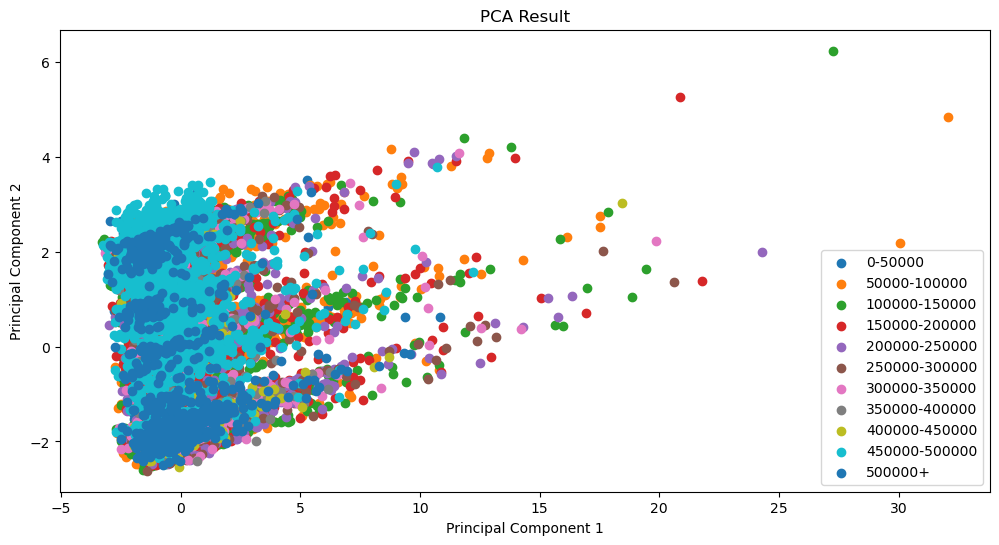

In [197]:
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=labels[label])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

### Singular Value Decomposition

In [198]:
U, S, Vh = np.linalg.svd(X_train_std, full_matrices= False)

print('matrix U has {} rows, {} columns\n'.format(*U.shape))
print('here are the first 5 rows.')

print('{}'.format(pd.DataFrame(U).head(5)))

matrix U has 16512 rows, 13 columns

here are the first 5 rows.
         0         1         2         3         4         5         6   \
0 -0.003299 -0.006799  0.002660 -0.021428  0.002956 -0.001485  0.001668   
1 -0.001893 -0.004137 -0.001545 -0.021889  0.005185 -0.001853  0.001624   
2  0.001683 -0.000982  0.004005 -0.017356 -0.012693  0.001538 -0.010740   
3  0.002489 -0.007512  0.004311 -0.021357  0.006357 -0.002330 -0.000407   
4  0.003590  0.004782  0.006283  0.001353  0.003638 -0.000622  0.005939   

         7         8         9         10        11        12  
0  0.000221 -0.009326 -0.003406 -0.005407  0.003119 -0.002272  
1  0.011623  0.010908  0.005723 -0.004137  0.007154 -0.500388  
2 -0.014208 -0.002477 -0.000566  0.021760 -0.000978 -0.033879  
3 -0.002640 -0.006604 -0.003626 -0.002845  0.000732 -0.000277  
4  0.013173  0.004790 -0.001057  0.000073  0.000983  0.029961  


In [199]:
print('matrix Vt has {} rows, {} columns\n'.format(*Vh.shape))

print('{}'.format(pd.DataFrame(Vh).head()))

matrix Vt has 13 rows, 13 columns

         0         1         2         3         4         5         6   \
0 -0.093074  0.090098  0.220040 -0.479414 -0.486293 -0.469765 -0.487755   
1 -0.517710  0.565865 -0.024575  0.094111  0.083621  0.044540  0.078340   
2  0.275694 -0.061435 -0.320345 -0.055576 -0.039773 -0.039163 -0.068912   
3 -0.054027  0.149936 -0.121124 -0.015017 -0.036442 -0.001486 -0.035145   
4  0.099427 -0.091452  0.514649 -0.074697  0.120054  0.126912  0.117284   

         7         8         9         10        11        12  
0 -0.047018 -0.054524  0.007058  0.004873  0.067770  0.007042  
1 -0.085084 -0.434307  0.288156 -0.009048  0.323329 -0.060662  
2 -0.306244 -0.306200  0.628079  0.005291 -0.473083  0.027971  
3  0.031836  0.437592  0.186315 -0.028164 -0.065997 -0.851338  
4 -0.767484  0.025349 -0.023698  0.195640  0.135144 -0.142328  


In [200]:
num_sv = np.arange(1, S.size+1)

cum_var_explained = [np.sum(np.square(S[0:n])) / np.sum(np.square(S)) for n in num_sv]

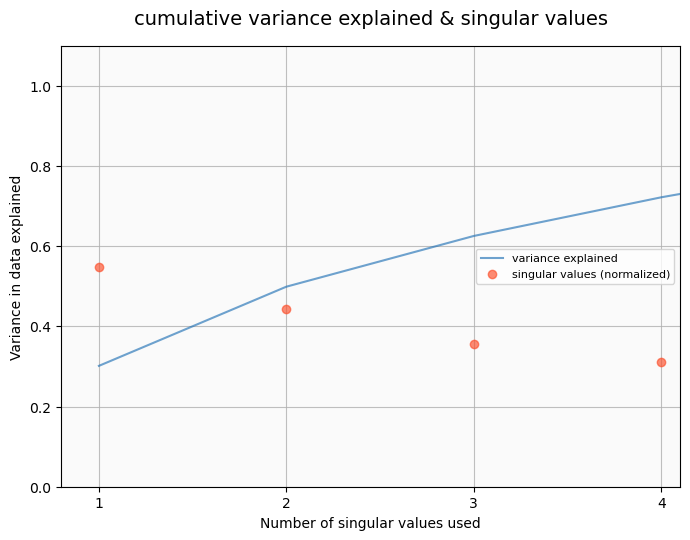

In [201]:
import sklearn
fig = plt.figure(figsize=(7.0,5.5))
ax = fig.add_subplot(111)

plt.plot(num_sv,
         cum_var_explained,
         color='#2171b5',
         label='variance explained',
         alpha=0.65,
         zorder=1000)

plt.scatter(num_sv,
            sklearn.preprocessing.normalize(S.reshape((1,-1))),
            color='#fc4e2a',
            label='singular values (normalized)',
            alpha=0.65,
            zorder=1000)

plt.legend(loc='center right', scatterpoints=1, fontsize=8)

ax.set_xticks(num_sv)
ax.set_xlim(0.8, 4.1)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel(r'Number of singular values used')
ax.set_ylabel('Variance in data explained')
ax.set_title('cumulative variance explained & singular values',
             fontsize=14,
             y=1.03)

ax.set_facecolor('0.98')

plt.grid(alpha=0.8, zorder=1)
plt.tight_layout()

In [202]:
k = 4
U_reduced = U[:, :k]
S_reduced = np.diag(S[:k])
Vh_reduced = Vh[:k, :]
reduced_matrix = np.dot(U_reduced, np.dot(S_reduced, Vh_reduced))

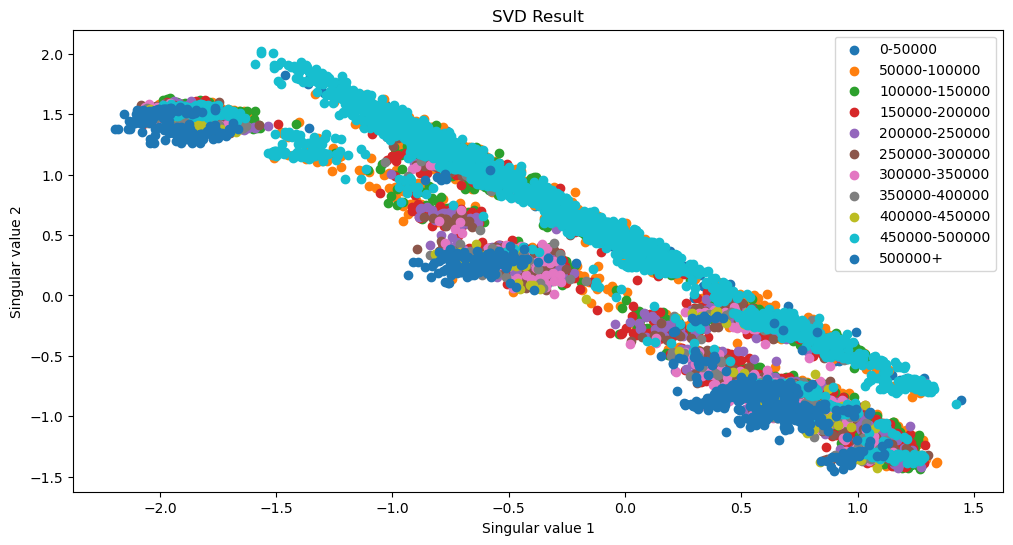

In [203]:
plt.figure(figsize=(12, 6))
for label in np.unique(y_train):
    plt.scatter(reduced_matrix[y_train == label, 0], reduced_matrix[y_train == label, 1], label=labels[label])
plt.title('SVD Result')
plt.xlabel('Singular value 1')
plt.ylabel('Singular value 2')
plt.legend()

### ROC Curve

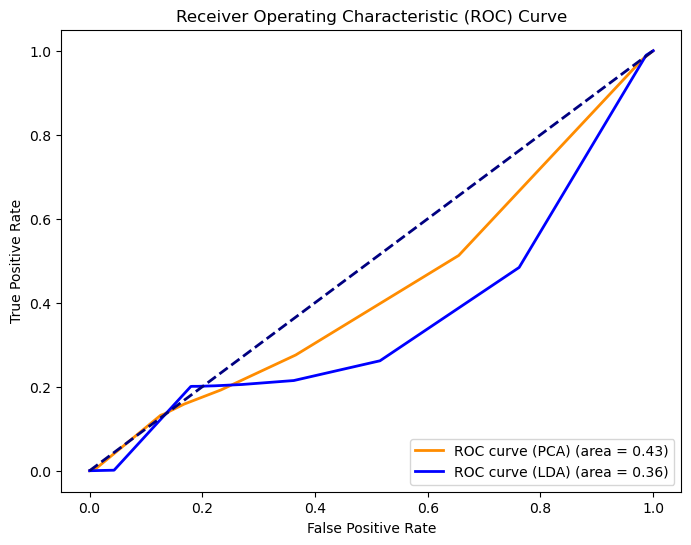

In [204]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label=f'ROC curve (PCA) (area = {roc_auc_pca:.2f})')
plt.plot(fpr_lda, tpr_lda, color='blue', lw=2, label=f'ROC curve (LDA) (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [205]:
# Evaluate using PCA features
accuracy_pca = train_and_evaluate(knn_pca, X_train_pca, X_test_pca, y_train, y_test)
print(f'Accuracy using k-NN with PCA: {accuracy_pca:.2%}')

Accuracy using k-NN with PCA: 24.90%


In [206]:
# Evaluate using LDA features
accuracy_lda = train_and_evaluate(knn_lda, X_train_lda, X_test_lda, y_train, y_test)
print(f'Accuracy using k-NN with LDA: {accuracy_lda:.2%}')

Accuracy using k-NN with LDA: 35.73%


# Model Implementations

In [207]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Naive Bayesian Classifier

In [208]:
#implement the classifier
classifier = GaussianNB()
classifier.fit(X_train_std, y_train)

GaussianNB()

In [209]:
#Predict the test set results
#y_pred
predictions= classifier.predict(X_test_std)
#predictions[:10]

Accuracy score:  0.3478682170542636
confusion_matrix: 
 [[  9   2   1   0   0   0   0   0   0  31   0]
 [  7 155 236  28   0   0   8   0   0 281  55]
 [  1 123 469 102   0   0  19   0   0 113  87]
 [  1  57 228 173   0   1  17   0   0  24  82]
 [  2  20  90 104   1   0  23   0   0  14 119]
 [  0  11  55  55   0   0  20   0   0   4  95]
 [  0   9  34  22   0   1  13   0   0   3  93]
 [  0   1  14  17   0   0   7   0   0   0  58]
 [  1   1   9   8   0   0   8   0   1   0  34]
 [ 36  79  41   2   0   0   0   0   0 491  38]
 [  1   1  24  19   1   0  13   0   0   1 124]]


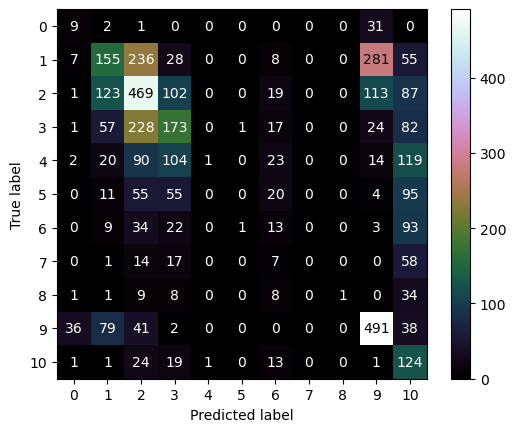

Classification report: 
               precision    recall  f1-score   support

           0       0.16      0.21      0.18        43
           1       0.34      0.20      0.25       770
           2       0.39      0.51      0.44       914
           3       0.33      0.30      0.31       583
           4       0.50      0.00      0.01       373
           5       0.00      0.00      0.00       240
           6       0.10      0.07      0.09       175
           7       0.00      0.00      0.00        97
           8       1.00      0.02      0.03        62
           9       0.51      0.71      0.60       687
          10       0.16      0.67      0.26       184

    accuracy                           0.35      4128
   macro avg       0.32      0.25      0.20      4128
weighted avg       0.35      0.35      0.31      4128



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [210]:
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.cubehelix)
plt.show()
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions)))

## KNN Classifier

In [211]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
model = knn.fit(X_train_std,y_train)
predictions = model.predict(X_test_std)
#y_pred[:10]

Accuracy score:  0.45251937984496127
confusion_matrix: 
 [[  3   2   2   0   0   0   0   0   0  36   0]
 [  1 431 155  33   4   2   1   1   0 141   1]
 [  0 246 483 115  28   7   4   0   0  29   2]
 [  0  58 212 213  62  16   8   0   1  11   2]
 [  0  27  70 120 114  21   8   5   0   4   4]
 [  0  16  38  40  71  43  15  12   0   0   5]
 [  0  13  16  27  50  23  21   3   4   1  17]
 [  0   2   8  21  22   4  14   3   3   0  20]
 [  0   2   5   4   9   8  13   5   2   2  12]
 [  4 193  19   3   1   0   0   0   0 466   1]
 [  0   4  15  12  18  11  21   8   4   2  89]]


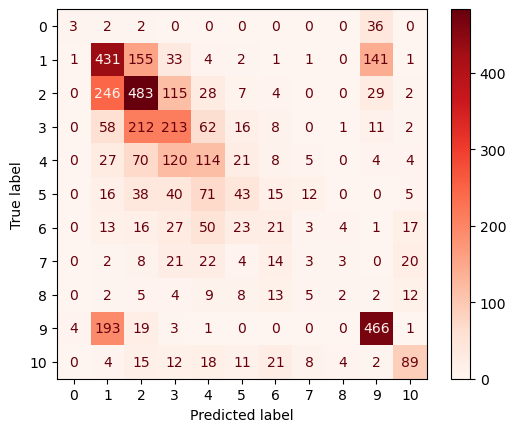

Classification report: 
               precision    recall  f1-score   support

           0       0.38      0.07      0.12        43
           1       0.43      0.56      0.49       770
           2       0.47      0.53      0.50       914
           3       0.36      0.37      0.36       583
           4       0.30      0.31      0.30       373
           5       0.32      0.18      0.23       240
           6       0.20      0.12      0.15       175
           7       0.08      0.03      0.04        97
           8       0.14      0.03      0.05        62
           9       0.67      0.68      0.68       687
          10       0.58      0.48      0.53       184

    accuracy                           0.45      4128
   macro avg       0.36      0.30      0.31      4128
weighted avg       0.44      0.45      0.44      4128



In [212]:
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.Reds)
plt.show()
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions)))

## ID3 Classifier

In [213]:
from sklearn.tree import DecisionTreeClassifier
#Decision Tree using Entropy
dt= DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015) 
dt.fit(X_train_std, y_train)    
predictions = dt.predict(X_test_std)

Accuracy score:  0.36046511627906974
confusion_matrix: 
 [[  0   1   2   0   0   0   0   0   0  40   0]
 [  0 271 374   0   0   0   0   0   0 122   3]
 [  0 160 678   0   0   0   0   0   0  25  51]
 [  0  58 391   0   0   0   0   0   0   8 126]
 [  0  31 206   0   0   0   0   0   0   3 133]
 [  0  14 121   0   0   0   0   0   0   0 105]
 [  0   9  84   0   0   0   0   0   0   0  82]
 [  0   3  31   0   0   0   0   0   0   0  63]
 [  0   4  24   0   0   0   0   0   0   1  33]
 [  0 154 120   0   0   0   0   0   0 412   1]
 [  0   7  49   0   0   0   0   0   0   1 127]]


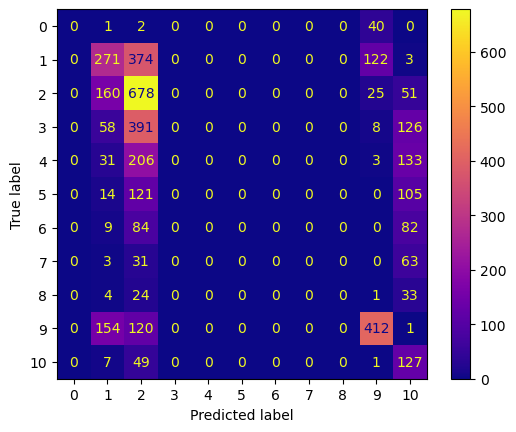

Classification report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.38      0.35      0.37       770
           2       0.33      0.74      0.45       914
           3       0.00      0.00      0.00       583
           4       0.00      0.00      0.00       373
           5       0.00      0.00      0.00       240
           6       0.00      0.00      0.00       175
           7       0.00      0.00      0.00        97
           8       0.00      0.00      0.00        62
           9       0.67      0.60      0.63       687
          10       0.18      0.69      0.28       184

    accuracy                           0.36      4128
   macro avg       0.14      0.22      0.16      4128
weighted avg       0.26      0.36      0.29      4128



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [214]:
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.plasma)
plt.show()
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions)))

## Linear Discriminant Analysis, as a Classifier

In [215]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit(X_train_std,y_train)
predictions=X_lda.predict(X_test_std)

Accuracy score:  0.4130329457364341
confusion_matrix: 
 [[  1   5   1   0   0   0   0   0   0  36   0]
 [  2 200 326  14   6   0   0   0   0 221   1]
 [  1 143 571  99  31   1   1   0   0  63   4]
 [  0  43 250 184  76   0   3   0   0  16  11]
 [  0  24  92 115 115   0   7   0   0   7  13]
 [  0   4  39  80  84   2  11   0   0   1  19]
 [  0   6  23  46  50   0  14   0   0   3  33]
 [  0   1   6  24  28   0   6   0   0   0  32]
 [  0   0   6  15  10   0   4   0   1   1  25]
 [  2  96  76   4   0   0   0   0   0 508   1]
 [  0   4  12  28  21   1   8   0   0   1 109]]


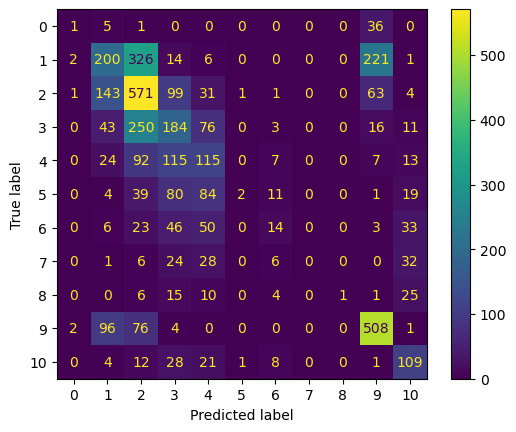

Classification report: 
               precision    recall  f1-score   support

           0       0.17      0.02      0.04        43
           1       0.38      0.26      0.31       770
           2       0.41      0.62      0.49       914
           3       0.30      0.32      0.31       583
           4       0.27      0.31      0.29       373
           5       0.50      0.01      0.02       240
           6       0.26      0.08      0.12       175
           7       0.00      0.00      0.00        97
           8       1.00      0.02      0.03        62
           9       0.59      0.74      0.66       687
          10       0.44      0.59      0.50       184

    accuracy                           0.41      4128
   macro avg       0.39      0.27      0.25      4128
weighted avg       0.40      0.41      0.38      4128



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
Accuracy= print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('confusion_matrix: \n', format(confusion_matrix(y_test, predictions)))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap=plt.cm.viridis)
plt.show()
from sklearn.metrics import classification_report
Classification =print('Classification report: \n', format(classification_report (y_test, predictions)))

## KNN Regressor

In [217]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 2.5124515503875973
Mean Squared Error: 9.713246124031008
Root Mean Squared Error: 3.1166081120395948


## Decision Tree Regressor

In [218]:
from sklearn.tree import DecisionTreeRegressor
Dtree= DecisionTreeRegressor()
Dtree.fit(X_train, y_train)
predictions = Dtree.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.6632751937984496
Mean Squared Error: 9.136143410852712
Root Mean Squared Error: 3.02260540111552


# References

Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

Géron, A. (2017). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media.